# Phishing website Detector :
phishing website dataset

## Import Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


## Load and View Data

In [18]:
df = pd.read_csv('phishing.csv')  

# View shape and top records
print("Shape:", df.shape)
print(df.head())


Shape: (11054, 32)
   Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0      0        1        1         1        1              1             -1   
1      1        1        0         1        1              1             -1   
2      2        1        0         1        1              1             -1   
3      3        1        0        -1        1              1             -1   
4      4       -1        0        -1        1             -1             -1   

   SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  IframeRedirection  \
0           0      1            -1  ...                 1                  1   
1          -1     -1            -1  ...                 1                  1   
2          -1     -1             1  ...                 1                  1   
3           1      1            -1  ...                -1                  1   
4           1      1            -1  ...                 1                  1   

   AgeofDomain  DNSRecord

## Check Class Distribution

class
 1    6157
-1    4897
Name: count, dtype: int64


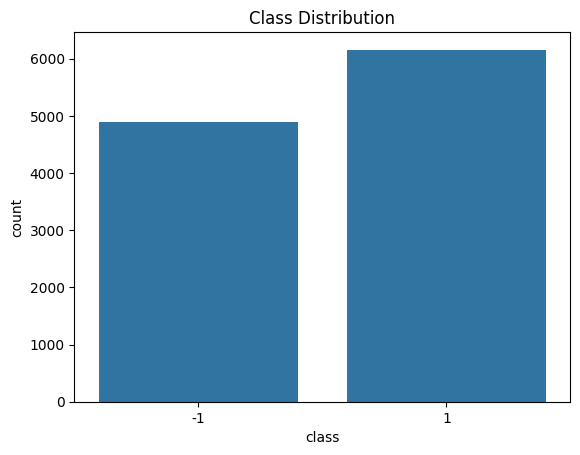

In [19]:
class_counts = df['class'].value_counts()
print(class_counts)


sns.countplot(data=df, x='class')
plt.title("Class Distribution")
plt.show()


## Correlation Analysis

class                  1.000000
HTTPS                  0.714704
AnchorURL              0.692895
PrefixSuffix-          0.348588
WebsiteTraffic         0.346003
SubDomains             0.298231
RequestURL             0.253478
LinksInScriptTags      0.248415
ServerFormHandler      0.221380
GoogleIndex            0.129000
AgeofDomain            0.121402
PageRank               0.104593
UsingIP                0.094033
StatsReport            0.079632
DNSRecording           0.075579
LongURL                0.057661
Symbol@                0.052994
StatusBarCust          0.041878
NonStdPort             0.036461
LinksPointingToPage    0.032694
InfoEmail              0.018039
DisableRightClick      0.012675
Index                  0.000802
UsingPopupWindow       0.000136
Favicon               -0.000231
IframeRedirection     -0.003362
WebsiteForwarding     -0.020151
Redirecting//         -0.038885
HTTPSDomainURL        -0.040096
AbnormalURL           -0.060751
ShortURL              -0.067931
DomainRe

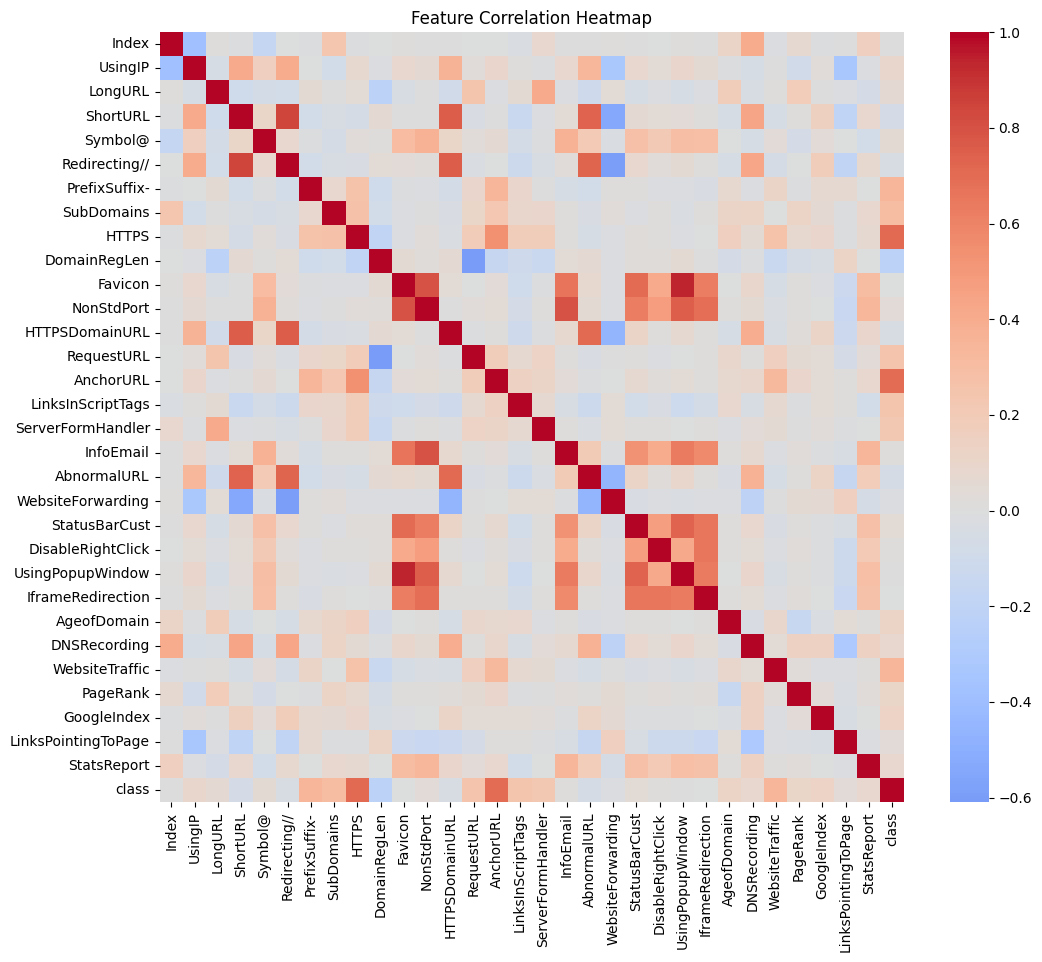

In [20]:
correlation = df.corr(numeric_only=True)['class'].sort_values(ascending=False)
print(correlation)


plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


## Top Positive & Negative Correlations

##### In the phishing website detection dataset, correlation values reveal how strongly each feature is associated with either legitimate or phishing websites. **Positive correlations** indicate that the feature is more commonly found in legitimate websites. For instance, features like `HTTPS`, `AnchorURL`, `WebsiteTraffic`, `PrefixSuffix-`, and `SubDomains` show high positive correlation. This means that websites using secure HTTPS protocols, clean anchor tags, and having good domain structure and traffic are more likely to be legitimate.

##### On the other hand, **negative correlations** suggest a stronger association with phishing websites. Features such as `DomainRegLen`, `ShortURL`, `AbnormalURL`, and `Redirecting//` are negatively correlated with the class label. This implies that phishing websites often have short domain registration lengths, use shortened URLs, have abnormal structures, or redirect frequently using slashes (`//`). These are considered red flags in detecting phishing activity.

##### In summary, features with high positive correlation support the legitimacy of a website, while those with high negative correlation indicate suspicious or potentially malicious behavior. These insights help in building an accurate classification model that can distinguish between phishing and legitimate websites based on observable website characteristics.


In [21]:
top_pos = correlation[1:6]
top_neg = correlation[-5:]

print("Top Positive Correlations:\n", top_pos)
print("\nTop Negative Correlations:\n", top_neg)


Top Positive Correlations:
 HTTPS             0.714704
AnchorURL         0.692895
PrefixSuffix-     0.348588
WebsiteTraffic    0.346003
SubDomains        0.298231
Name: class, dtype: float64

Top Negative Correlations:
 Redirecting//    -0.038885
HTTPSDomainURL   -0.040096
AbnormalURL      -0.060751
ShortURL         -0.067931
DomainRegLen     -0.225879
Name: class, dtype: float64


## Train-Test Split + Model Training

In [22]:

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


## Model Evaluation

In [23]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9683448899608079

Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.96      0.96      1455
           1       0.97      0.98      0.97      1862

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317




## Conclusion
The phishing website detector performs with high accuracy. Key features such as the presence of HTTPS, clean anchor and request URLs, and a normal domain length and age contribute significantly to prediction. This model can serve as a reliable baseline phishing detection engine to help protect users from malicious websites.

